# Nell Hanna

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
titanic = pd.read_csv("/Users/nellhanna/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

In [5]:
titanic = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Survived']]

In [6]:
titanic.Sex[titanic.Sex == 'female'] = 0
titanic.Sex[titanic.Sex == 'male'] = 1
titanic["Sex"] = titanic["Sex"].astype(str).astype(int)

<ipython-input-6-6ca0f9575340>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.Sex[titanic.Sex == 'male'] = 1


In [7]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [8]:
titanic.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

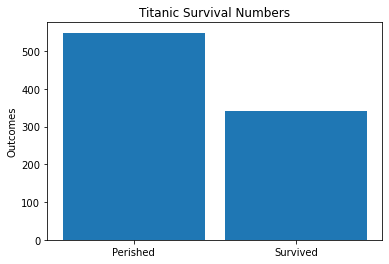

In [9]:
counts = titanic['Survived'].value_counts()
w = .35
plt.bar(x=[0,.4], height=counts, width=w)
plt.xticks([0,.4], ("Perished", "Survived"))
plt.ylabel("Outcomes")
plt.title('Titanic Survival Numbers')
plt.show()

In [10]:
titanic[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]].mean()

Survived     0.383838
Pclass       2.308642
Sex          0.647587
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64

In [17]:
grouped_titanic = titanic.groupby("Survived")

mean_titanic = grouped_titanic.mean()
print(mean_titanic)

            Pclass       Sex        Age     SibSp     Parch       Fare
Survived                                                              
0         2.531876  0.852459  30.626179  0.553734  0.329690  22.117887
1         1.950292  0.318713  28.343690  0.473684  0.464912  48.395408


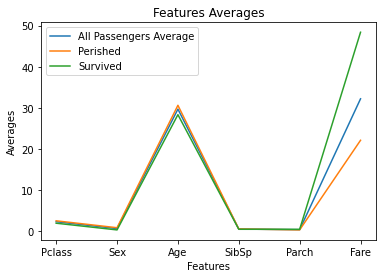

In [18]:
outcomesgraph = titanic.groupby(titanic['Survived']).mean()
outcomesgraphT = outcomesgraph.T
outcomesgraphT
meantitanic = titanic[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]].mean()
outcomesgraphT['All Passengers Average']= meantitanic
outcomesgraphT
plt.plot(outcomesgraphT['All Passengers Average'], label='All Passengers Average')
plt.plot(outcomesgraphT[0], label='Perished')
plt.plot(outcomesgraphT[1], label='Survived')
plt.title("Features Averages")
plt.xlabel("Features")
plt.ylabel("Averages")
plt.legend()
plt.show()

In [19]:
column = outcomesgraphT.columns.tolist()
column = [column[-1]] + column[:-1]
outcomesgraphT = outcomesgraphT[column]
titanic2 = outcomesgraphT.T
titanic2

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
All Passengers Average,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


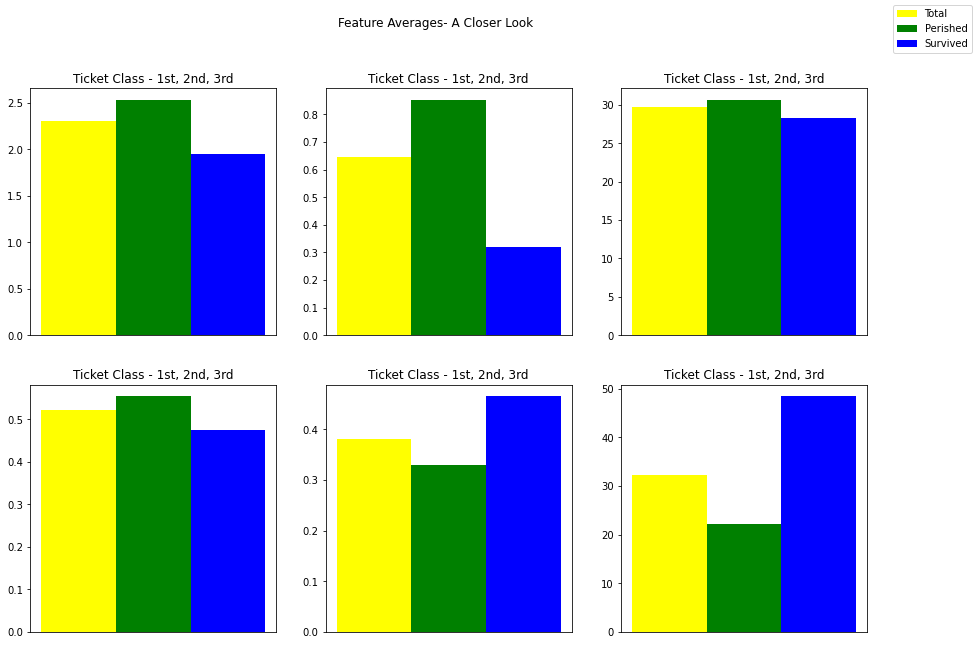

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
names = ['Ticket Class - 1st, 2nd, 3rd', 'Sex - 0 female, 1 male', 'Age', 'Number Siblings/Spouses Aboard', 'Number Parents/Children Aboard', 'Fare']
Pclass = titanic2['Pclass']
Sex = titanic2['Sex']
Age = titanic2['Age']
SibSp = titanic2['SibSp']
Parch = titanic2['Parch']
Fare = titanic2['Fare']

titles = ['Total', 'Perished', 'Survived']
ax[0,0].bar(x=0, height =0, width=0, color='yellow', label = 'Total')
ax[0,0].bar(x=0, height =0, width=0, color='green', label = 'Perished')
ax[0,0].bar(x=0, height =0, width=0, color='blue', label = 'Survived')

ax[0,0].bar(x=[0,.5,1] ,height=Pclass, color=['yellow','green','blue'], width=.5)
ax[0,0].axes.xaxis.set_visible(False)
ax[0,0].set_title(names[0])

ax[0,1].bar(x=[0,.5,1] ,height=Sex, color=['yellow','green','blue'], width=.5)
ax[0,1].axes.xaxis.set_visible(False)
ax[0,1].set_title(names[0])

ax[0,2].bar(x=[0,.5,1] ,height=Age, color=['yellow','green','blue'], width=.5)
ax[0,2].axes.xaxis.set_visible(False)
ax[0,2].set_title(names[0])

ax[1,0].bar(x=[0,.5,1] ,height=SibSp, color=['yellow','green','blue'], width=.5)
ax[1,0].axes.xaxis.set_visible(False)
ax[1,0].set_title(names[0])

ax[1,1].bar(x=[0,.5,1] ,height=Parch, color=['yellow','green','blue'], width=.5)
ax[1,1].axes.xaxis.set_visible(False)
ax[1,1].set_title(names[0])

ax[1,2].bar(x=[0,.5,1] ,height=Fare, color=['yellow','green','blue'], width=.5)
ax[1,2].axes.xaxis.set_visible(False)
ax[1,2].set_title(names[0])

fig.legend()
fig.suptitle("Feature Averages- A Closer Look")
plt.show()


In [26]:
titanic.corr()['Survived']

Pclass     -0.338481
Sex        -0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

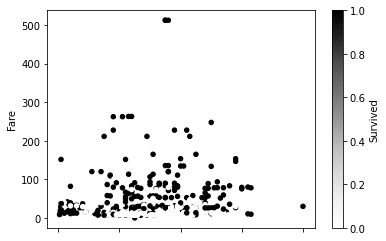

In [33]:
titanic.plot.scatter(x="Age",y="Fare", c="Survived")